# California housing
(Adapted from: Geron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow. O'Reilly.)

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

Import the data from *datasets/housing.csv* and print out some basic info about it.

In [2]:
housing = pd.read_csv("datasets/housing.csv")

In [3]:
# there are some missing values in attribute total_bedrooms
housing[housing.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [48]:
print(housing.head())
print(housing.describe())
print(housing.info())
print()
print(housing["ocean_proximity"].value_counts())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
          longitude      latitude  housing_median_age   total_rooms  \
coun

Plot the histograms of the features in the data set.

Save the image to a file.

In [49]:
housing[housing.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


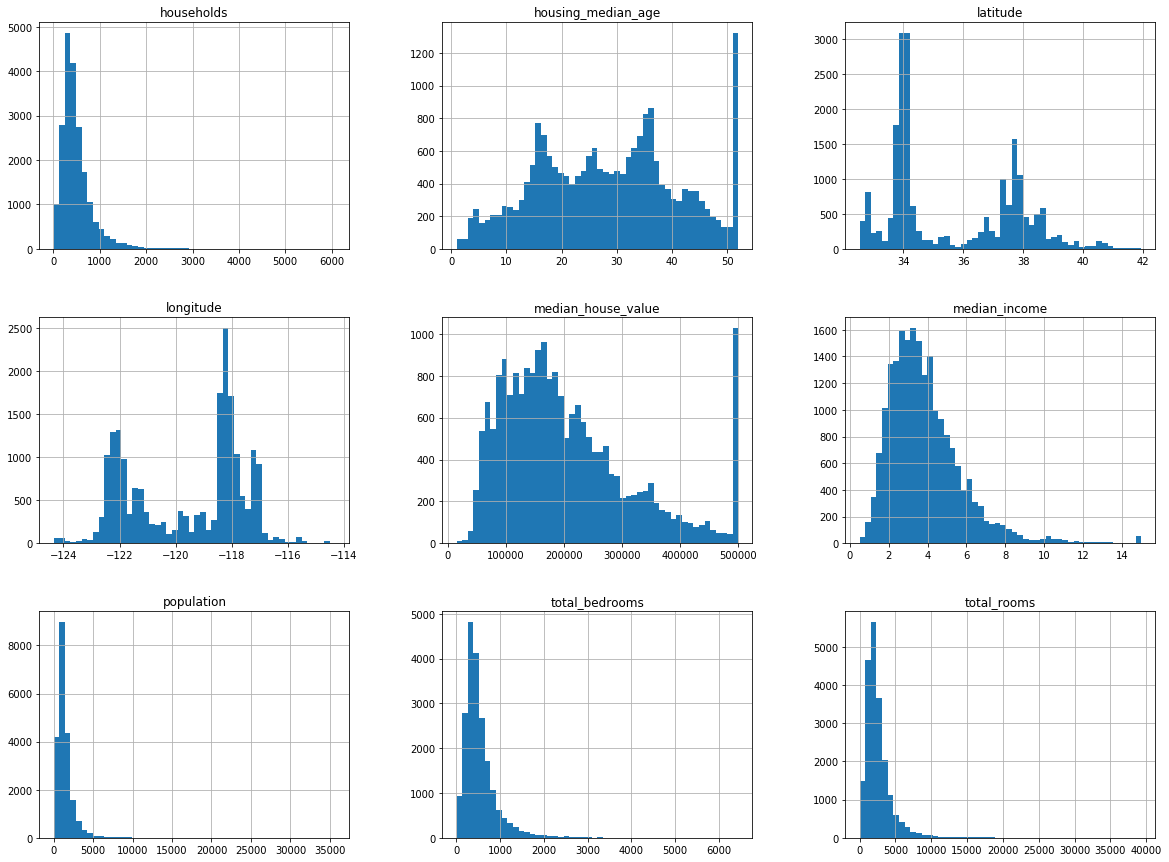

In [4]:
housing.hist(bins=50, figsize=(20,15))
plt.savefig("housing_hist.png", bbox_inches='tight')

Split the data set into a learning and test set in 70:30 ratio. Make the split stratified.

In [3]:
bins = np.linspace(0, max(housing["median_house_value"]), 50)
# Save discretized Y values in a new array, broken down by the bins created above.
mhv = np.digitize(housing["median_house_value"], bins)
# this is needed to make stratified train/test sets
L, T = train_test_split(housing, test_size=0.2, random_state=42, stratify=mhv)
print("Learning set size: {:d}\nTest set size: {:d}".format(len(L), len(T)))

Learning set size: 16512
Test set size: 4128


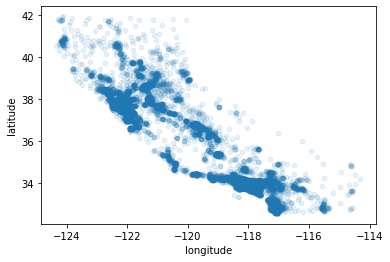

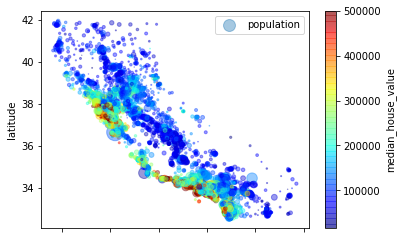

In [6]:
L.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.savefig("housing_lat_lon.png", bbox_inches='tight')

L.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
       s=L["population"]/100, label="population",
       c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend();

Computing correlations...


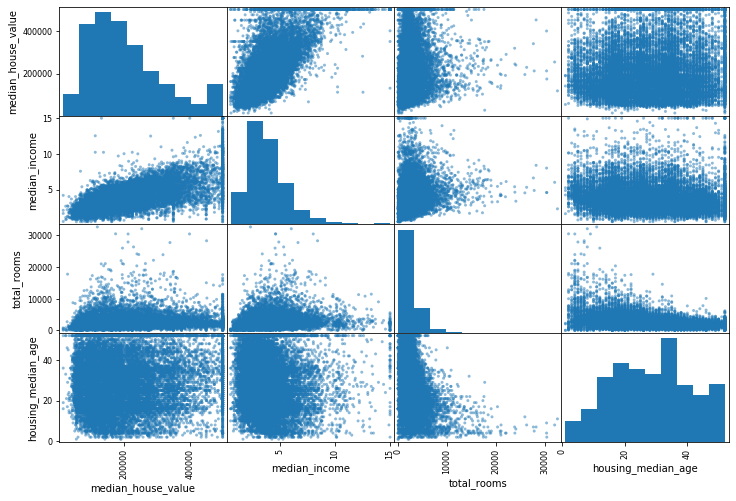

In [7]:
from pandas.plotting import scatter_matrix
print("Computing correlations...");
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"];
scatter_matrix(L[attributes], figsize=(12, 8));

In [22]:
# Manual feature construction
#L.loc["rooms_per_household"] = L["total_rooms"] / L["households"]
#L.loc["bedrooms_per_room"] = L["total_bedrooms"] / L["total_rooms"]
#L.loc["population_per_household"] = L["population"] / L["households"]

In [8]:
#Prepare the data for Machine Learning algorithms
housing = L.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = L["median_house_value"].copy()

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

In [39]:
housing[housing.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5678,-118.30,33.72,35.0,2790.0,NaN,1167.0,441.0,6.2028,NEAR OCEAN
20069,-120.37,38.01,30.0,473.0,NaN,242.0,93.0,2.5417,INLAND
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,NEAR OCEAN
19402,-120.93,37.73,14.0,2799.0,NaN,2294.0,596.0,2.6343,INLAND
19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,INLAND
...,...,...,...,...,...,...,...,...,...
15030,-117.02,32.78,31.0,2567.0,NaN,1198.0,499.0,3.4659,<1H OCEAN
18466,-121.75,37.11,18.0,3167.0,NaN,1414.0,482.0,6.8773,<1H OCEAN
16330,-121.33,38.02,31.0,1466.0,NaN,608.0,254.0,3.1827,INLAND
18873,-122.22,38.08,37.0,2811.0,NaN,1574.0,516.0,3.1053,NEAR BAY


In [10]:
rooms_ix, bedrooms_ix, population_ix, household_ix = [list(housing.columns).index(col) for col in ("total_rooms", "total_bedrooms", "population", "households")]

def add_extra_features(X):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False)

all_attributes = list(housing.columns)+["rooms_per_household", "population_per_household"]
housing_extra_attribs = attr_adder.fit_transform(housing.values)
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns = all_attributes)

In [11]:
housing_num = housing.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
print("Finishing data preparation...")

housing_prepared = full_pipeline.fit_transform(housing)
print("{}".format(housing_prepared.shape))

Finishing data preparation...
(16512, 15)


In [30]:
housing[housing.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [12]:
# Correlations with class after the pipeline
for i in range(housing_prepared.shape[1]):
    print("{:6.2f}".format(np.corrcoef(housing_prepared[:,i], housing_labels)[1,0]))

 -0.05
 -0.14
  0.11
  0.14
  0.05
 -0.03
  0.06
  0.69
  0.17
 -0.03
  0.26
 -0.49
  0.02
  0.16
  0.14


In [13]:
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [LinearRegression(),
          KNeighborsRegressor(n_neighbors=5),
          DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(n_estimators=10, random_state=42),
          LassoLars(alpha=.1),
          Ridge(alpha=.5),
         ]

In [14]:
print("Learning: fitting the models to data...")
for m in models:
    m.fit(housing_prepared, housing_labels)
print("_______________________________________\n")

print("Evaluating the models on training set")
from sklearn.metrics import mean_squared_error
for reg in models:
    housing_predictions = reg.predict(housing_prepared)
    rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
    print("{:23s}: {:.3f}".format(reg.__class__.__name__, rmse))

Learning: fitting the models to data...
_______________________________________

Evaluating the models on training set
LinearRegression       : 68527.792
KNeighborsRegressor    : 49665.076
DecisionTreeRegressor  : 0.000
RandomForestRegressor  : 21993.744
LassoLars              : 68527.957
Ridge                  : 68528.399


In [15]:
print("Evaluating the models using internal cross-validation")
from sklearn.model_selection import cross_val_score
for reg in models:
    scores = cross_val_score(reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print("{:23s}: {:.3f}+-{:.3f}".format(reg.__class__.__name__, rmse_scores.mean(), rmse_scores.std()))

Evaluating the models using internal cross-validation
LinearRegression       : 68619.235+-1991.340
KNeighborsRegressor    : 61620.492+-1701.308
DecisionTreeRegressor  : 70012.390+-1663.108
RandomForestRegressor  : 52282.641+-1853.916
LassoLars              : 68620.226+-1991.633
Ridge                  : 68619.142+-1999.717


In [16]:
print("Fine tuning the models with internal cross-validation")
from sklearn.model_selection import GridSearchCV
param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
             ]
grid_search = GridSearchCV(models[3], param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

print(grid_search.best_params_)

feature_importances = grid_search.best_estimator_.feature_importances_
for i in sorted(zip(feature_importances, list(housing_extra_attribs)), reverse=True):
    print(i)

Fine tuning the models with internal cross-validation
64531.21341933866 {'max_features': 2, 'n_estimators': 3}
54923.8339085509 {'max_features': 2, 'n_estimators': 10}
52417.77910350309 {'max_features': 2, 'n_estimators': 30}
58277.98981356531 {'max_features': 4, 'n_estimators': 3}
51884.1297285721 {'max_features': 4, 'n_estimators': 10}
49781.29732525728 {'max_features': 4, 'n_estimators': 30}
57083.900069805015 {'max_features': 6, 'n_estimators': 3}
51023.72534775874 {'max_features': 6, 'n_estimators': 10}
49156.06259224754 {'max_features': 6, 'n_estimators': 30}
57498.94810349523 {'max_features': 8, 'n_estimators': 3}
52061.761105034646 {'max_features': 8, 'n_estimators': 10}
49931.146730177796 {'max_features': 8, 'n_estimators': 30}
63850.9092398388 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53980.28442034608 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60576.94871509274 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52748.451290324156 {'b

In [17]:
print("Final testing...")
final_model = grid_search.best_estimator_
X_test = T.drop("median_house_value", axis=1)
y_test = T["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print("RMSE:{:10.2f}".format(final_rmse))

Final testing...
RMSE:  48105.57
